# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=True)


Loading dataset: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


# Methods

In [5]:
def print_year_occurrences(dataframe: pd.DataFrame):
    print(dataframe["time_call_received"].dt.year.value_counts())


# Main

In [6]:
dataframe = data_loader.processed_incidents_df.copy()

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754811 entries, 0 to 754810
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   triage_impression_during_call  754802 non-null  object        
 1   resource_id                    754811 non-null  object        
 2   resource_type                  754811 non-null  object        
 3   resources_sent                 754811 non-null  int64         
 4   time_call_received             754811 non-null  datetime64[ns]
 5   time_call_answered            754811 non-null  datetime64[ns]
 6   time_ambulance_notified        754333 non-null  datetime64[ns]
 7   time_dispatch                  731707 non-null  datetime64[ns]
 8   time_arrival_scene             665649 non-null  datetime64[ns]
 9   time_departure_scene           560737 non-null  datetime64[ns]
 10  time_arrival_hospital          557995 non-null  datetime64[ns]
 11  t

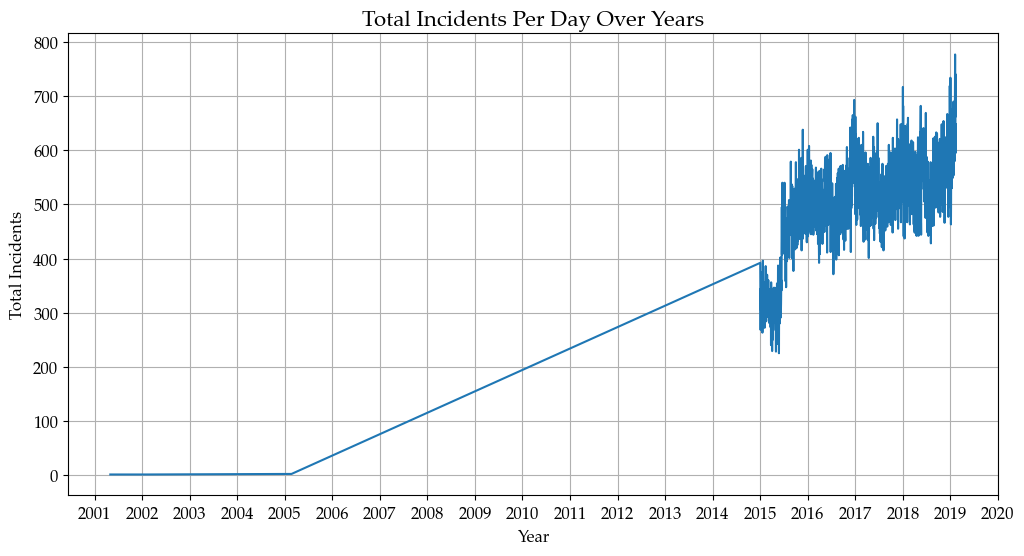

time_call_received
2018    201675
2017    193086
2016    185976
2015    147880
2019     26190
2005         2
2001         1
2002         1
Name: count, dtype: int64


In [7]:
plotter.incidents_over_years(dataframe)
print_year_occurrences(dataframe)


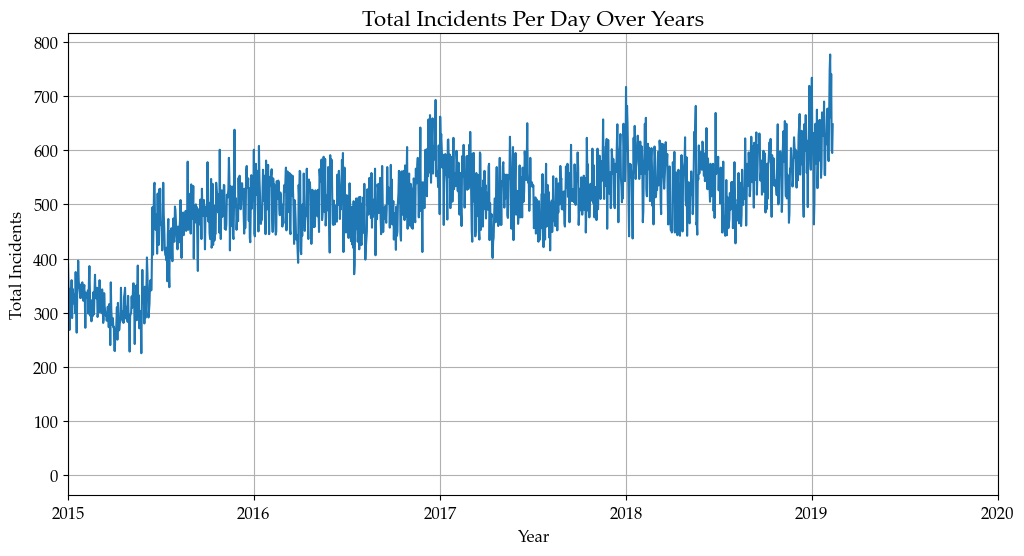

In [8]:
plotter.incidents_over_years(dataframe, limit_left="2015-01-01")


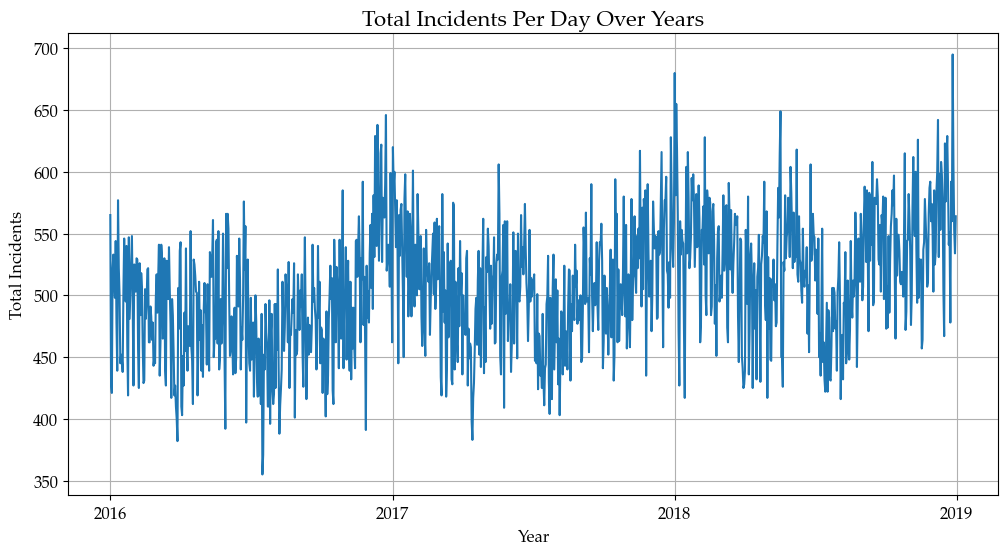

time_call_received
2018    192800
2017    184470
2016    177970
Name: count, dtype: int64


In [9]:
dataframe = data_preprocessor._remove_duplicates(dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)

plotter.incidents_over_years(dataframe)
print_year_occurrences(dataframe)


time_call_received
2018    146593
2017    139215
2016    135870
Name: count, dtype: int64


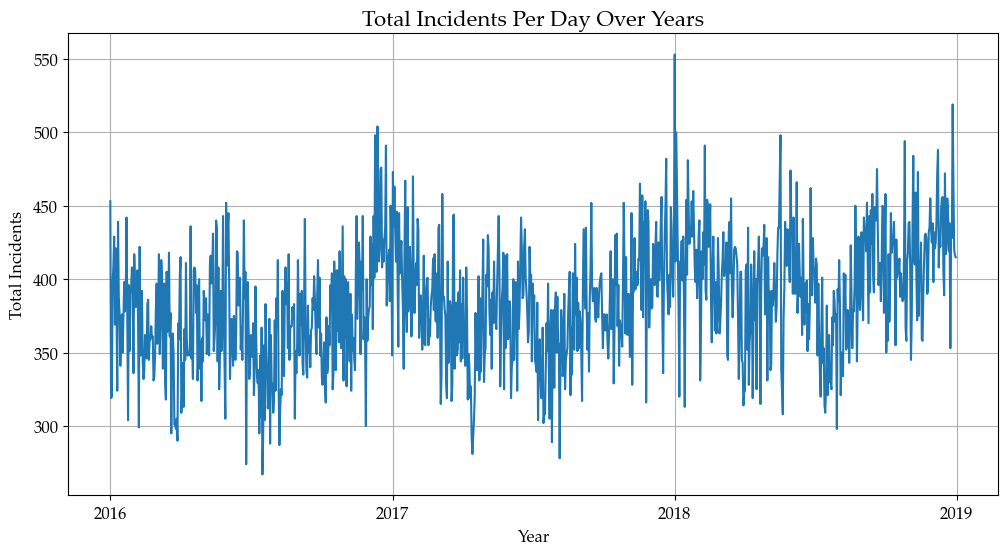

In [10]:
dataframe = data_preprocessor._remove_outside_region(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    142414
2017    133474
2016    128380
Name: count, dtype: int64


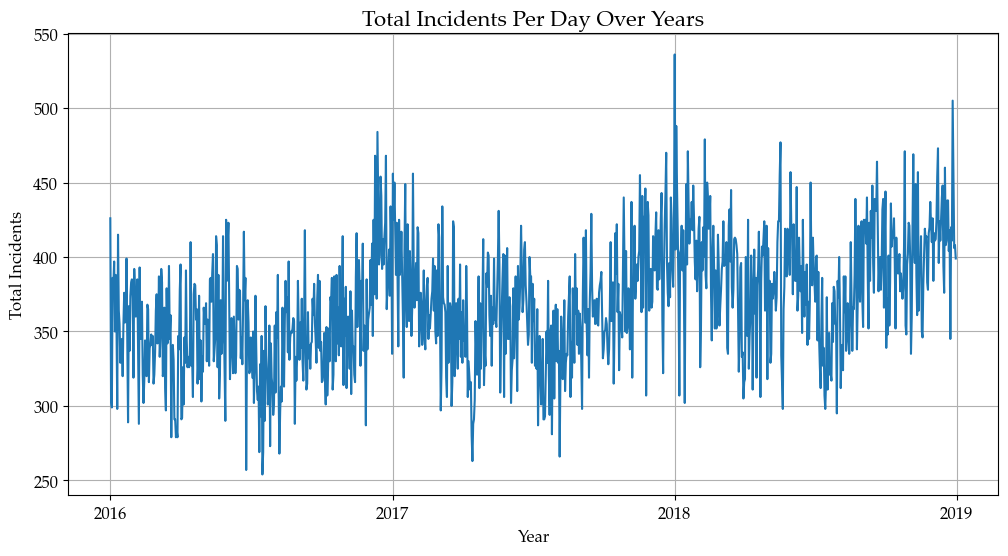

In [11]:
dataframe = data_preprocessor._remove_other_resource_types(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    124716
2017    118597
2016    115214
Name: count, dtype: int64


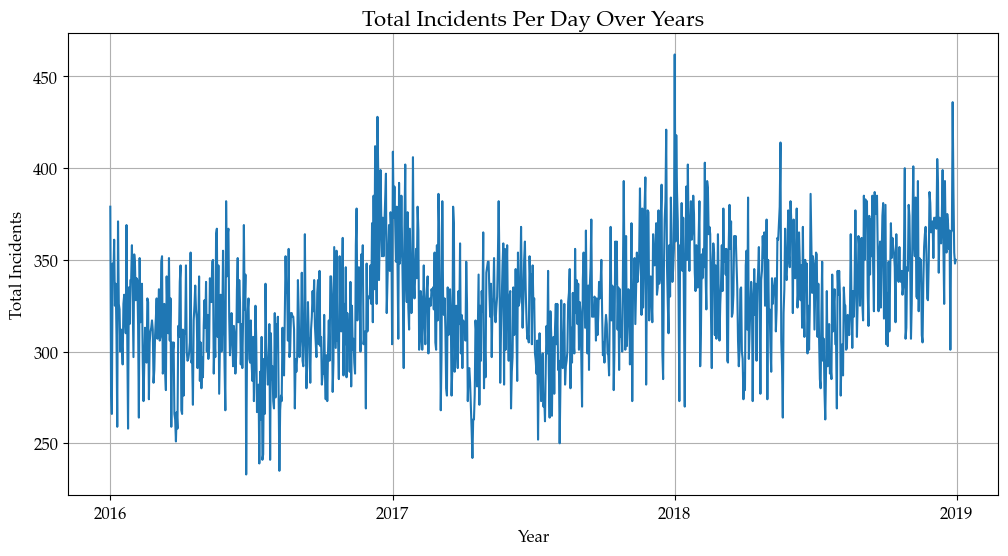

In [12]:
dataframe = data_preprocessor._remove_extra_resources(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    113479
2017    107959
2016    104288
Name: count, dtype: int64


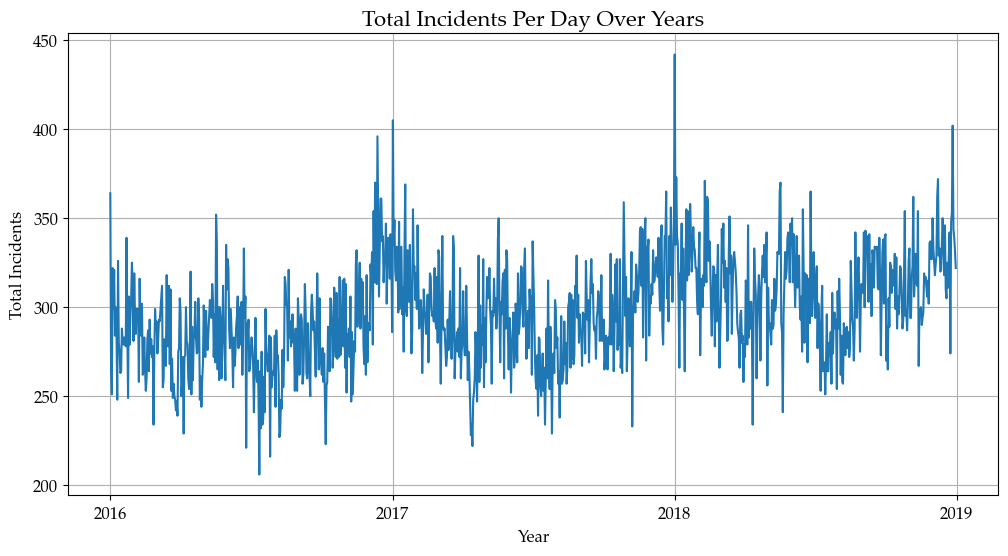

In [13]:
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    113165
2017    106022
2016    104034
Name: count, dtype: int64


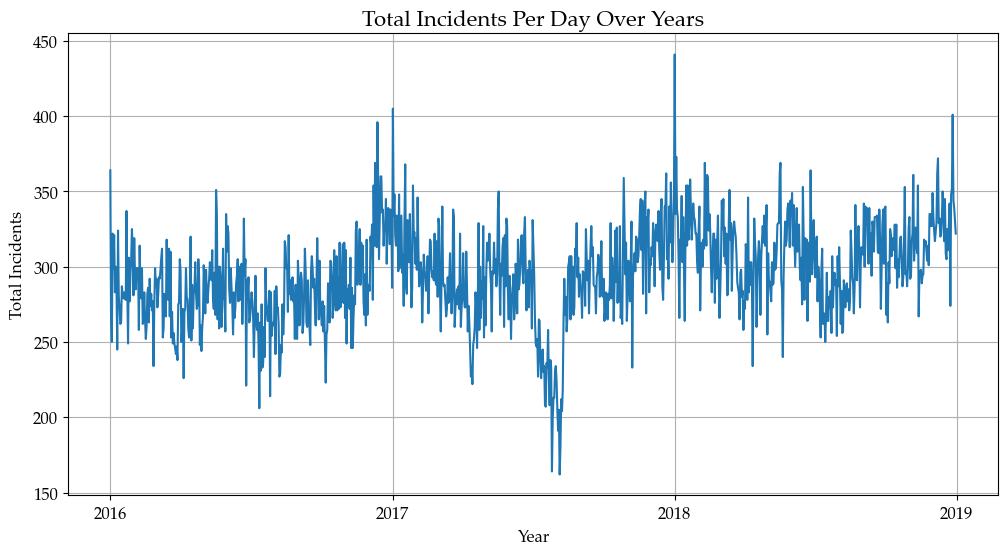

In [14]:
dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    102065
2017     95667
2016     93232
Name: count, dtype: int64


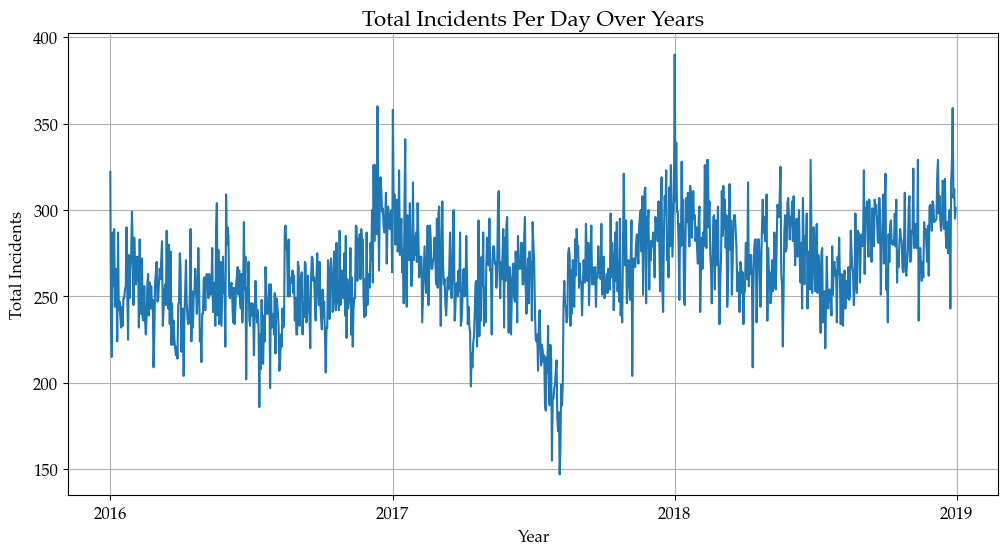

In [15]:
dataframe = data_preprocessor._fix_timestamps(dataframe)
dataframe = data_preprocessor._remove_na(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    80216
2017    76763
2016    75189
Name: count, dtype: int64


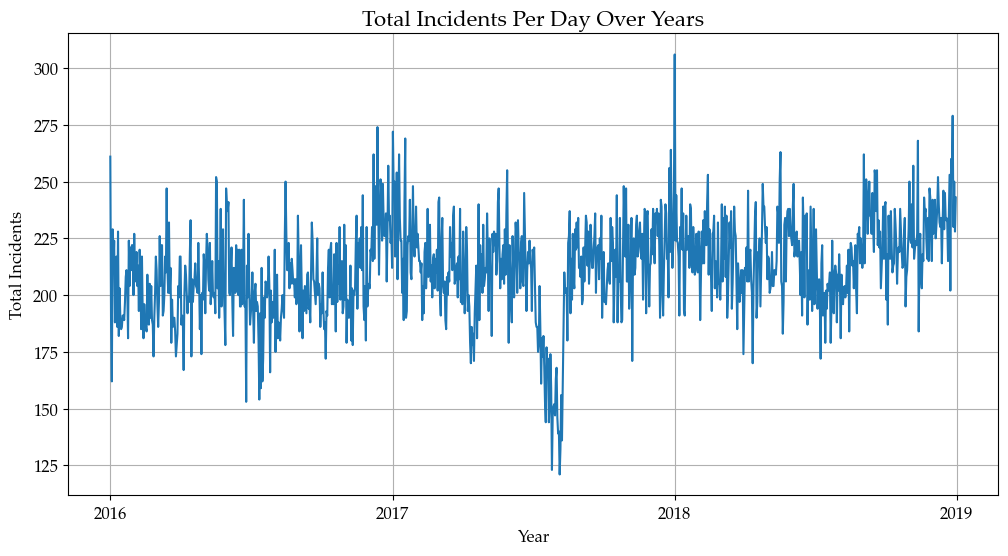

In [16]:
dataframe = data_preprocessor._remove_outside_iqr_bounds(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


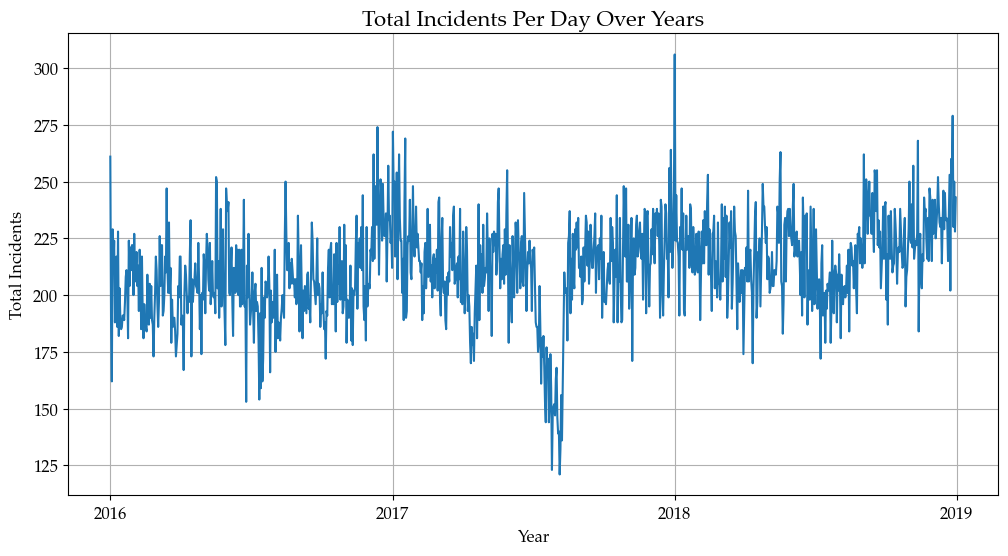

time_call_received
2018    80216
2017    76763
2016    75189
Name: count, dtype: int64


In [17]:
plotter.incidents_over_years(data_loader.enhanced_incidents_df)
print_year_occurrences(data_loader.enhanced_incidents_df)
